In [1]:
%matplotlib inline

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Let's use familiar data to introduce ourselves to pandas - an earthquake catalog. Specifically, the results of a libcomcat search around the Ridgecrest epicenter from 2 months before the M 6.4 foreshock to two months after.

In [74]:
eqfile = '../data/ridgecrest3.xlsx'

In [75]:
eqdf = pd.read_excel(eqfile)
eqdf

,id,time,location,latitude,longitude,depth,magnitude,alert,url
0,ci38345111,2019-05-04 02:27:29.320,"25km NNW of Searles Valley, CA",35.983000,-117.469333,1.54,0.81,NaN,https://earthquake.usgs.gov/earthquakes/eventp...
1,ci38345487,2019-05-04 09:43:11.700,"15km WNW of Searles Valley, CA",35.828500,-117.552000,1.91,0.56,NaN,https://earthquake.usgs.gov/earthquakes/eventp...
2,ci38345607,2019-05-04 12:48:44.030,"13km E of Coso Junction, CA",36.042833,-117.805167,1.71,0.50,NaN,https://earthquake.usgs.gov/earthquakes/eventp...
3,ci38345655,2019-05-04 13:23:55.130,"10km NE of Coso Junction, CA",36.099333,-117.861167,0.94,0.99,NaN,https://earthquake.usgs.gov/earthquakes/eventp...
4,ci38345967,2019-05-04 16:46:18.830,"16km N of Inyokern, CA",35.785833,-117.784500,5.16,0.56,NaN,https://earthquake.usgs.gov/earthquakes/eventp...
...,...,...,...,...,...,...,...,...,...
33063,ci38813023,2019-09-05 22:24:33.180,"18km SSW of Searles Valley, CA",35.613333,-117.462000,8.74,1.22,NaN,https://earthquake.usgs.gov/earthquakes/eventp...
33064,ci38813055,2019-09-05 22:51:25.630,"20km E of Little Lake, CA",35.931500,-117.679167,2.53,0.78,NaN,https://earthquake.usgs.gov/earthquakes/eventp...
33065,ci38813095,2019-09-05 23:12:31.470,"14km ENE of Ridgecrest, CA",35.676833,-117.533500,10.70,0.96,NaN,https://earthquake.usgs.gov/earthquakes/eventp...
33066,ci38813135,2019-09-05 23:40:10.870,"22km ESE of Little Lake, CA",35.857498,-117.681999,6.93,0.79,NaN,https://earthquake.usgs.gov/earthquakes/eventp...


In [76]:
# How many earthquakes?
print(len(eqdf[eqdf['magnitude'] > 1]))
print(len(eqdf[eqdf['magnitude'] > 2]))
print(len(eqdf[eqdf['magnitude'] > 3]))
print(len(eqdf[eqdf['magnitude'] > 4]))
print(len(eqdf[eqdf['magnitude'] > 5]))
print(len(eqdf[eqdf['magnitude'] > 6]))

23427
5246
955
105
6
2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12279e748>]],
      dtype=object)

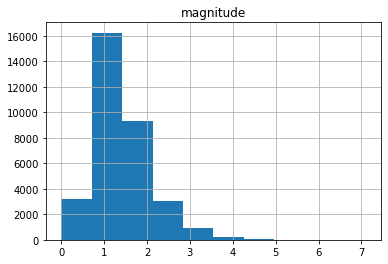

In [77]:
eqdf.hist('magnitude')

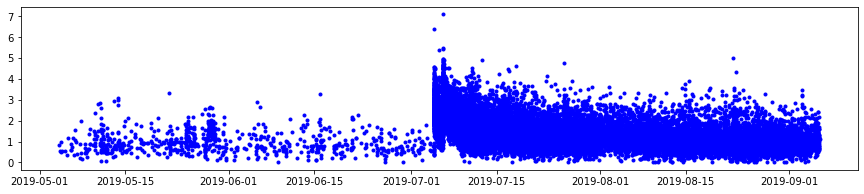

In [78]:
plt.figure(figsize=(15,3));
plt.plot(eqdf['time'],eqdf['magnitude'],'b.');
# why big gap in earthquakes?

In [79]:
# when were the two big events?
foreshock = eqdf[eqdf['magnitude'] == 6.4].iloc[0]
foreshock

id                                                  ci38443183
time                                       2019-07-04 17:33:49
location                         11km SW of Searles Valley, CA
latitude                                               35.7053
longitude                                             -117.504
depth                                                     10.5
magnitude                                                  6.4
alert                                                   yellow
url          https://earthquake.usgs.gov/earthquakes/eventp...
Name: 733, dtype: object

In [80]:
mainshock = eqdf[eqdf['magnitude'] == 7.1].iloc[0]
mainshock

id                                                  ci38457511
time                                2019-07-06 03:19:53.040000
location                   2019 Ridgecrest Earthquake Sequence
latitude                                               35.7695
longitude                                             -117.599
depth                                                        8
magnitude                                                  7.1
alert                                                   yellow
url          https://earthquake.usgs.gov/earthquakes/eventp...
Name: 2627, dtype: object

In [81]:
#plot two days before foreshock to two days after mainshock
c1 = eqdf['time'] > foreshock['time'] - timedelta(days=2)
c2 = eqdf['time'] < mainshock['time'] + timedelta(days=2)
subset = eqdf[c1 & c2]
len(subset)

5064

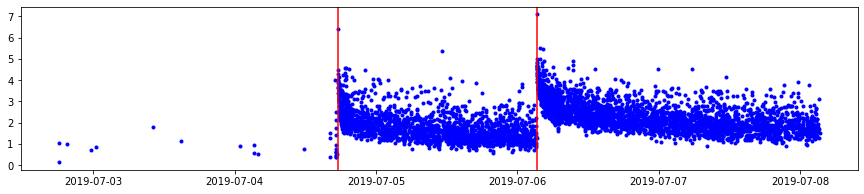

In [82]:
plt.figure(figsize=(15,3));
plt.plot(subset['time'],subset['magnitude'],'b.');
plt.axvline(foreshock['time'], color='red');
plt.axvline(mainshock['time'], color='red');

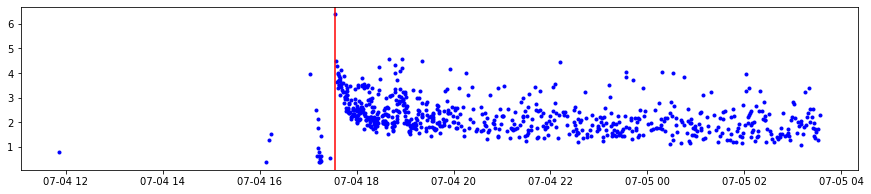

In [83]:
# zoom into 4 hours just before foreshock
secs = 10 * 3600
c1 = eqdf['time'] > foreshock['time'] - timedelta(seconds=secs)
c2 = eqdf['time'] < foreshock['time'] + timedelta(seconds=secs)
subset2 = eqdf[c1 & c2]
plt.figure(figsize=(15,3));
plt.plot(subset2['time'],subset2['magnitude'],'b.');
plt.axvline(foreshock['time'], color='red');